In [1]:
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
from args_tools_jupyter import args, createfolder, make_path, checkpath
from radar_wrangler import *

In [2]:
print(args.keys())
pd.read_csv(args.ty_list)

dict_keys(['study_area', 'working_folder', 'ty_list', 'sta_list', 'TW_map_file', 'fortran_code_folder', 'radar_folder', 'radar_raw_data_folder', 'radar_compressed_data_folder', 'radar_wrangled_data_folder', 'radar_figures_folder', 'weather_folder', 'weather_raw_data_folder', 'weather_wrangled_data_folder', 'ty_info_folder', 'ty_info_raw_data_folder', 'ty_info_wrangled_data_folder', 'res_degree', 'compression', 'figure_dpi', 'RAD_level', 'QPE_level', 'QPF_level', 'PP01_level', 'PS01_level', 'WD01_level', 'WD02_level', 'RH01_level', 'TX01_level', 'RAD_cmap', 'QPE_cmap', 'QPF_cmap', 'PP01_cmap', 'PS01_cmap', 'WD01_cmap', 'WD02_cmap', 'RH01_cmap', 'TX01_cmap', 'weather_names', 'I_x', 'I_y', 'F_x', 'F_y', 'O_y', 'O_x', 'I_shape', 'F_shape', 'O_shape', 'I_x_iloc', 'I_y_iloc', 'F_x_iloc', 'F_y_iloc', 'I_x_list', 'I_y_list', 'F_x_list', 'F_y_list', 'O_x_list', 'O_y_list'])


,En name,Ch name,Time of issuing,Time of canceling
0,SAOLA,蘇拉,2012-07-31 21:00:00,2012-08-03 14:00:00
1,SOULIK,蘇力,2013-07-12 12:00:00,2013-07-13 23:00:00
2,TRAMI,潭美,2013-08-20 20:00:00,2013-08-22 08:00:00
3,KONG-REY,康芮,2013-08-28 11:00:00,2013-08-29 17:00:00
4,USAGI,天兔,2013-09-20 08:00:00,2013-09-22 08:00:00
5,FITOW,菲特,2013-10-05 14:00:00,2013-10-07 08:00:00
6,MATMO,麥德姆,2014-07-22 02:00:00,2014-07-23 23:00:00
7,CHAN-HOM,昌鴻,2015-07-09 20:00:00,2015-07-10 23:00:00
8,SOUDELOR,蘇迪勒,2015-08-07 09:00:00,2015-08-09 20:00:00
9,DUJUAN,杜鵑,2015-09-28 06:00:00,2015-09-29 17:00:00


In [3]:
checkpath(args.ty_list)
checkpath(args.TW_map_file+'.prj')
checkpath(args.radar_wrangled_data_folder)

Path exists!
Path exists!
Path exists!


In [4]:
extract_original_data()

|SAOLA   | start time: 2012-07-31 21:00:00 | end time: 2012-08-03 14:00:00 |
|--------------------------------------------------------------------------|
|SOULIK  | start time: 2013-07-12 12:00:00 | end time: 2013-07-13 23:00:00 |
|--------------------------------------------------------------------------|
|TRAMI   | start time: 2013-08-20 20:00:00 | end time: 2013-08-22 08:00:00 |
|--------------------------------------------------------------------------|
|KONG-REY| start time: 2013-08-28 11:00:00 | end time: 2013-08-29 17:00:00 |
|--------------------------------------------------------------------------|
|USAGI   | start time: 2013-09-20 08:00:00 | end time: 2013-09-22 08:00:00 |
|--------------------------------------------------------------------------|
|FITOW   | start time: 2013-10-05 14:00:00 | end time: 2013-10-07 08:00:00 |
|--------------------------------------------------------------------------|
|MATMO   | start time: 2014-07-22 02:00:00 | end time: 2014-07-23 23:00:00 |

In [5]:
_ = output_files()

----------------------------------------
2012.SAOLA
----------------------------------------
2013.FITOW
----------------------------------------
2013.KONG-REY
----------------------------------------
2013.SOULIK
----------------------------------------
2013.TRAMI
----------------------------------------
2013.USAGI
----------------------------------------
2014.MATMO
----------------------------------------
2015.CHAN-HOM
----------------------------------------
2015.DUJUAN
----------------------------------------
2015.SOUDELOR
----------------------------------------
2016.MALAKAS
----------------------------------------
2016.MEGI
----------------------------------------
2018.MARIA


In [6]:
_ = check_data_and_create_miss_data()

In [4]:
# 2012.SAOLA
data1 = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2012.SAOLA.201208021530.pkl'),compression=args.compression)
data2 = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2012.SAOLA.201208021620.pkl'),compression=args.compression)

data = data1 + (data2 - data1)/5*1
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2012.SAOLA.201208021540.pkl'),compression=args.compression)
data = data1 + (data2 - data1)/5*2
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2012.SAOLA.201208021550.pkl'),compression=args.compression)
data = data1 + (data2 - data1)/5*3
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2012.SAOLA.201208021600.pkl'),compression=args.compression)
data = data1 + (data2 - data1)/5*4
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2012.SAOLA.201208021610.pkl'),compression=args.compression)

In [5]:
# 2015.SOUDELOR
l1 = ['080700','080800','081000','081200','081750','081850','082050','090150','090700','091000']
l2 = ['080710','080810','081010','081210','081800','081900','082100','090200','090710','091010']
ll = ['080720','080820','081020','081220','081810','081910','082110','090210','090720','091020']
for i in range(len(ll)):
    data1 = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2015.SOUDELOR.201508'+l1[i]+'.pkl'),compression=args.compression)
    data2 = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2015.SOUDELOR.201508'+l2[i]+'.pkl'),compression=args.compression)

    data = data1 + (data2 - data1)/2
    data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2015.SOUDELOR.201508'+ll[i]+'.pkl'),compression=args.compression)
    
data1 = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2015.SOUDELOR.201508081100.pkl'),compression=args.compression)
data2 = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2015.SOUDELOR.201508081130.pkl'),compression=args.compression)

data = data1 + (data2 - data1)/3*1
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2015.SOUDELOR.201508081110.pkl'),compression=args.compression)
data = data1 + (data2 - data1)/3*2
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2015.SOUDELOR.201508081120.pkl'),compression=args.compression)

In [6]:
# 2016.MEGI
data1 = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2016.MEGI.201609271830.pkl'),compression=args.compression)
data2 = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2016.MEGI.201609271740.pkl'),compression=args.compression)

data = data1 + (data2 - data1)/7*1
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2016.MEGI.201609271840.pkl'),compression=args.compression)
data = data1 + (data2 - data1)/7*2
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2016.MEGI.201609271850.pkl'),compression=args.compression)
data = data1 + (data2 - data1)/7*3
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2016.MEGI.201609271900.pkl'),compression=args.compression)
data = data1 + (data2 - data1)/7*4
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2016.MEGI.201609271910.pkl'),compression=args.compression)
data = data1 + (data2 - data1)/7*5
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2016.MEGI.201609271920.pkl'),compression=args.compression)
data = data1 + (data2 - data1)/7*6
data.to_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', '2016.MEGI.201609271930.pkl'),compression=args.compression)

In [7]:
measures = overall_of_data()
measures

,QPE,QPF,RAD
Measures,,,
max,199.5000,199.7500,88.1000
min,0.0000,0.0000,0.0000
mean,1.2661,2.8420,10.3157
std,4.0902,6.4332,14.1738


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
args.radar_folder

'/home/jack/ssd/01_ty_research/01_radar_data'

In [9]:
if not os.path.exists(os.path.join(args.radar_folder, 'All_data(RAD_QPE).pkl')):
    df = pd.DataFrame([])
    for idxi, i in enumerate(['QPE','RAD']):
        data = np.array([])
        data_folder = os.path.join(args.radar_wrangled_data_folder, i)
        for idxj, j in enumerate(sorted(os.listdir(data_folder))):
            data_path = os.path.join(data_folder, j)
            if idxj%1000 == 0:
                print('{:s} idx:{:5d}, file:{}'.format(i, idxj+1, j))
            tmp = pd.read_pickle(data_path, compression=args.compression).loc[args.I_y[0]:args.I_y[1], args.I_x[0]:args.I_x[1]]
            data = np.append(data, tmp.values.flatten())
        df[i] = data
    # save the flatten data
    df.to_pickle(os.path.join(args.radar_folder, 'All_data(RAD_QPE).pkl'), compression=args.compression)
else:
    df = pd.read_pickle(os.path.join(args.radar_folder, 'All_data(RAD_QPE).pkl'), compression=args.compression)
    df.head()

In [22]:
df['RAD_trans'] = (10**(df.RAD/10)/200)**(5/8)

In [23]:
df.head()

,QPE,RAD,RAD_trans
0,0.75,28.3,2.1409
1,0.75,26.9,1.7503
2,1.00,26.8,1.7253
3,1.00,26.8,1.7253
4,1.00,27.4,1.8809


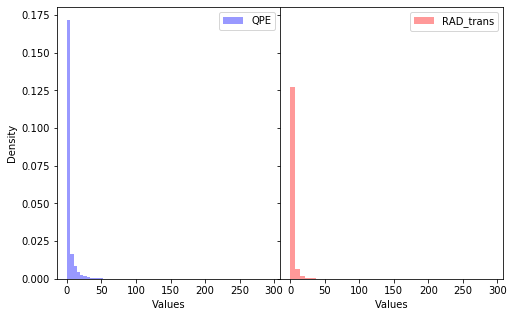

In [26]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,5))
color = ['b','r']
for idx, name in enumerate(df.iloc[:,[0,2]]):
    sns.distplot(df[name].values, bins=40, kde=False, ax=ax[idx], hist_kws={'label':name, 'density':True, 'color':color[idx]})
    ax[idx].set_xlabel('Values')
    ax[idx].legend()
ax[0].set_ylabel('Density')
plt.subplots_adjust(wspace=0, hspace=0)
outputpath = os.path.join(args.radar_figures_folder, 'data_properties')
createfolder(outputpath)
fig.savefig(os.path.join(outputpath, 'RADvsQPE_density.png'), bbox_inches='tight', dpi=args.figure_dpi)

In [31]:
df.corr('spearman')

,QPE,RAD,RAD_trans
QPE,1.0000,0.7069,0.7069
RAD,0.7069,1.0000,1.0000
RAD_trans,0.7069,1.0000,1.0000


Text(0, 0.5, 'QPE')

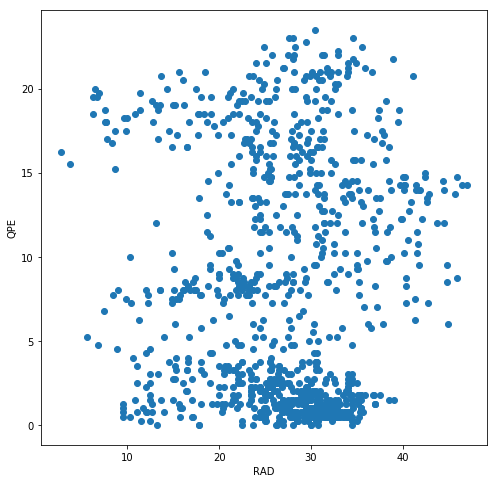

In [31]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.scatter(df.RAD[df.RAD>0][:1000], df.QPE[df.RAD>0][:1000])
ax.set_xlabel('RAD')
ax.set_ylabel('QPE')

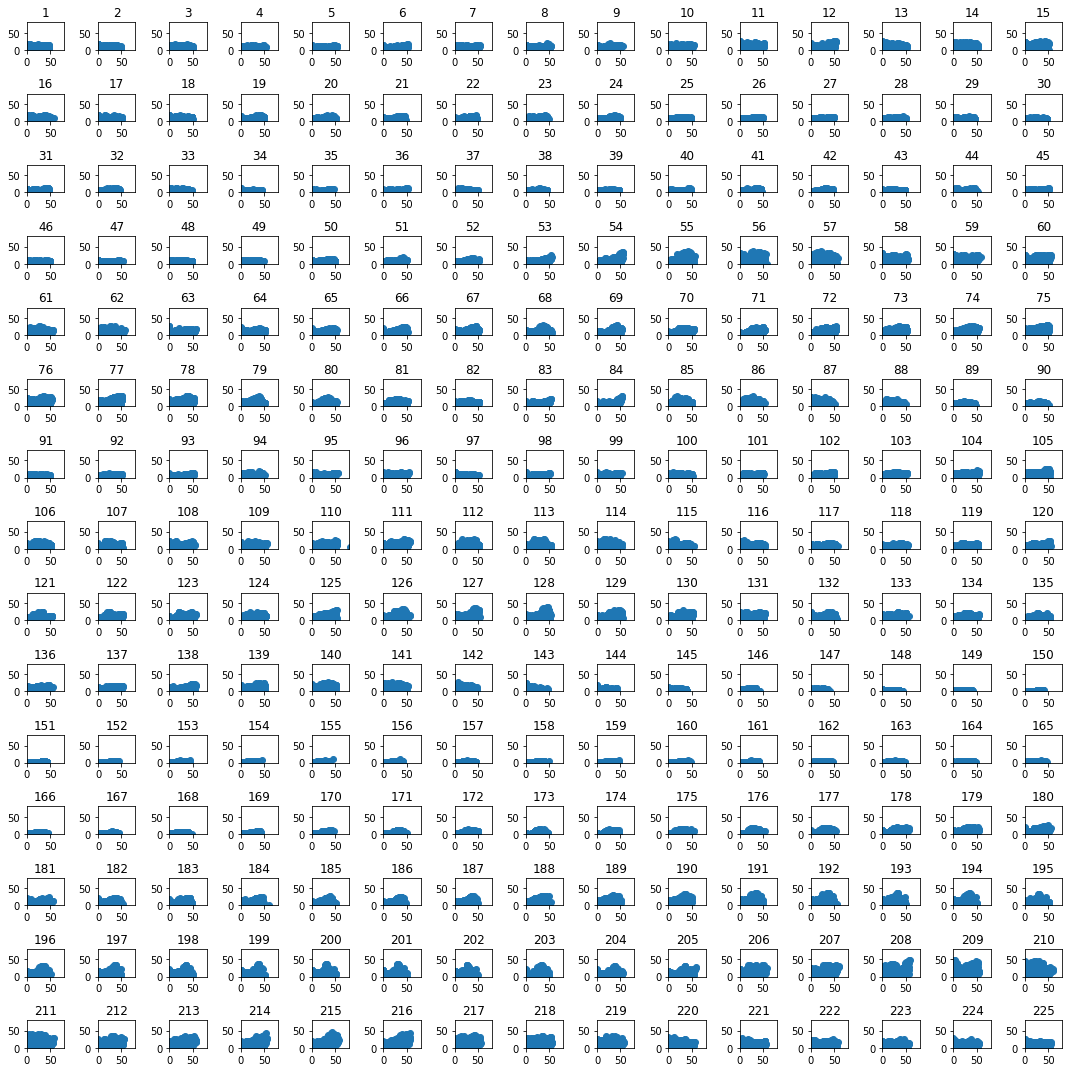

In [59]:
fig = plt.figure(figsize=(15,15))
for i in range(225):
    ax = plt.subplot(15,15,i+1)
    ax.scatter(df.RAD[180*180*i:180*180*(i+1)], df.QPE[180*180*i:180*180*(i+1)])
#     ax.set_xlabel('RAD values')
#     ax.set_ylabel('QPE values')
    ax.set_xlim(0,80)
    ax.set_ylim(0,80)
    ax.set_title(i+1)

plt.tight_layout()

In [25]:
for i in df:
    print(i)

QPE
RAD
